In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback
%matplotlib inline

In [2]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)

def acc_plot(history, name):
    plt.figure(figsize=(10,6))
    plt.plot(history['accuracy'], label='training accuracy')
    plt.plot(history['loss'], label='training loss')    
    plt.plot(history['val_accuracy'], label='validation accuracy')
    plt.plot(history['val_loss'], label='validation loss')
    plt.title(name + ' Accuracy and Loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.savefig(name +'_Result.png', bbox_inches='tight', dpi=300)
    return plt.show()

def gen_csv(model, name):
    result = dfTest[['Id']].copy()
    result['Label'] = model.predict_classes(MinMaxScaler().fit_transform(dfTest.iloc[:,1:]).reshape((-1, 28, 28, 1)))
    result.to_csv('result' + name + '.csv', encoding='utf-8', index=False)

In [2]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
dfTest = pd.read_csv('testX.csv')
X_train, X_val, y_train, y_val = train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), to_categorical(df.iloc[:,0], num_classes=5), test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), to_categorical(df.iloc[:,0], num_classes=5), test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.67, random_state = 42)

### Model 1-4

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 68us/sample - loss: 0.6630 - accuracy: 0.7203 - val_loss: 0.4795 - val_accuracy: 0.8049
Epoch 2/30
48000/48000 [==============================] - 2s 49us/sample - loss: 0.4737 - accuracy: 0.8089 - val_loss: 0.3982 - val_accuracy: 0.8457
Epoch 3/30
48000/48000 [==============================] - 3s 52us/sample - loss: 0.4218 - accuracy: 0.8291 - val_loss: 0.3739 - val_accuracy: 0.8553
Epoch 4/30
48000/48000 [==============================] - 3s 52us/sample - loss: 0.3868 - accuracy: 0.8454 - val_loss: 0.3582 - val_accuracy: 0.8595
Epoch 5/30
48000/48000 [==============================] - 3s 53us/sample - loss: 0.3658 - accuracy: 0.8532 - val_loss: 0.3316 - val_accuracy: 0.8706
Epoch 6/30
48000/48000 [==============================] - 2s 51us/sample - loss: 0.3453 - accuracy: 0.8606 - val_loss: 0.3181 - val_accuracy: 0.8758
Epoch 7/30
48000/48000 [==============================] 

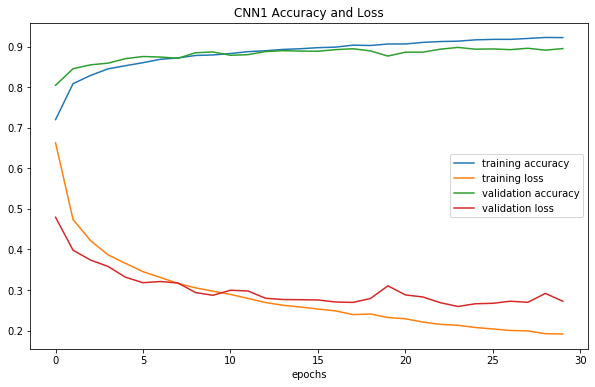

In [5]:
CNN1 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
CNN1.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
historyCNN1 = CNN1.fit(X_train, y_train, epochs = 30, batch_size=128, validation_data = (X_val, y_val))
acc_plot(historyCNN1.history, 'CNN1')
# gen_csv(CNN1, 'CNN1')

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 8s 167us/sample - loss: 0.6734 - accuracy: 0.7329 - val_loss: 1.9945 - val_accuracy: 0.3558
Epoch 2/30
48000/48000 [==============================] - 6s 126us/sample - loss: 0.4737 - accuracy: 0.8089 - val_loss: 0.4397 - val_accuracy: 0.8198
Epoch 3/30
48000/48000 [==============================] - 6s 127us/sample - loss: 0.4263 - accuracy: 0.8304 - val_loss: 0.5398 - val_accuracy: 0.7794
Epoch 4/30
48000/48000 [==============================] - 6s 129us/sample - loss: 0.3924 - accuracy: 0.8442 - val_loss: 0.3791 - val_accuracy: 0.8442
Epoch 5/30
48000/48000 [==============================] - 6s 126us/sample - loss: 0.3696 - accuracy: 0.8526 - val_loss: 0.3502 - val_accuracy: 0.8530
Epoch 6/30
48000/48000 [==============================] - 6s 127us/sample - loss: 0.3490 - accuracy: 0.8614 - val_loss: 0.4814 - val_accuracy: 0.8112
Epoch 7/30
48000/48000 [==========================

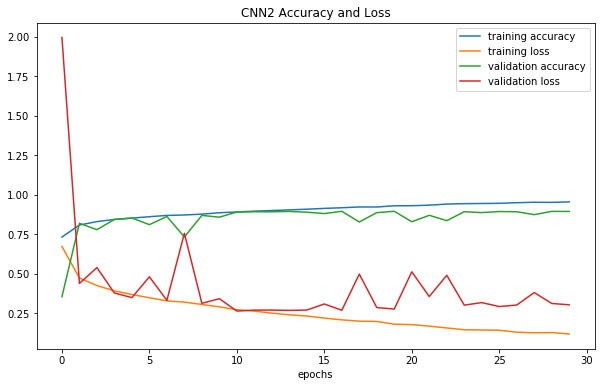

In [7]:
CNN2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
CNN2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
historyCNN2 = CNN2.fit(X_train, y_train, epochs = 30, batch_size=128, validation_data = (X_val, y_val))
acc_plot(historyCNN2.history, 'CNN2')
# gen_csv(CNN2, 'CNN2')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 8, zoom_range = 0.1, shear_range = 0.3, width_shift_range=0.08, height_shift_range=0.08, vertical_flip=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history = model.fit(datagen.flow(X_train, y_train, batch_size = 128), epochs = 40, validation_data = (X_test, y_test), steps_per_epoch=X_train.shape[0] // 128, callbacks = [reduce_lr])
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

  ...
    to  
  ['...']
Train for 375 steps, validate on 12000 samples
Epoch 1/40
375/375 [==============================] - 23s 63ms/step - loss: 0.6649 - accuracy: 0.7512 - val_loss: 0.3261 - val_accuracy: 0.8732
Epoch 2/40
375/375 [==============================] - 21s 55ms/step - loss: 0.5207 - accuracy: 0.7897 - val_loss: 0.3525 - val_accuracy: 0.8547
Epoch 3/40
375/375 [==============================] - 22s 58ms/step - loss: 0.4928 - accuracy: 0.8031 - val_loss: 0.3338 - val_accuracy: 0.8637
Epoch 4/40
375/375 [==============================] - 20s 54ms/step - loss: 0.4783 - accuracy: 0.8084 - val_loss: 0.4013 - val_accuracy: 0.8298
Epoch 5/40
375/375 [==============================] - 21s 56ms/step - loss: 0.4631 - accuracy: 0.8143 - val_loss: 0.6324 - val_accuracy: 0.7389
Epoch 6/40
375/375 [==============================] - 21s 56ms/step - loss: 0.4547 - accuracy: 0.8170 - val_loss: 0.3197 - val_accuracy: 0.8668
Epoch 7/40
375/375 [==============================] - 21s 57ms/s

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 10s 209us/sample - loss: 0.7444 - accuracy: 0.7101 - val_loss: 1.8707 - val_accuracy: 0.3083
Epoch 2/40
48000/48000 [==============================] - 8s 170us/sample - loss: 0.5126 - accuracy: 0.7951 - val_loss: 0.6754 - val_accuracy: 0.7340
Epoch 3/40
48000/48000 [==============================] - 8s 169us/sample - loss: 0.4673 - accuracy: 0.8112 - val_loss: 0.6909 - val_accuracy: 0.7222
Epoch 4/40
48000/48000 [==============================] - 8s 170us/sample - loss: 0.4335 - accuracy: 0.8274 - val_loss: 0.6116 - val_accuracy: 0.7573
Epoch 5/40
48000/48000 [==============================] - 8s 170us/sample - loss: 0.4213 - accuracy: 0.8312 - val_loss: 0.5340 - val_accuracy: 0.7878
Epoch 6/40
48000/48000 [==============================] - 8s 171us/sample - loss: 0.4057 - accuracy: 0.8370 - val_loss: 0.3587 - val_accuracy: 0.8554
Epoch 7/40
48000/48000 [=========================

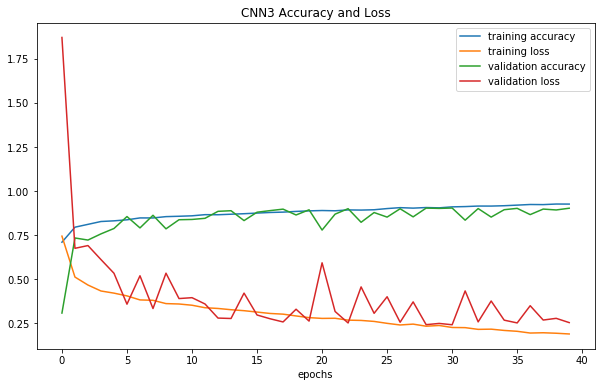

In [8]:
CNN3 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
CNN3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
historyCNN3 = CNN3.fit(X_train, y_train, epochs = 40, batch_size=128, validation_data = (X_val, y_val), callbacks = [reduce_lr])
acc_plot(historyCNN3.history, 'CNN3')
# gen_csv(CNN3, 'CNN3')

In [ ]:
CNN4 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
CNN4.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
historyCNN4 = CNN4.fit(X_train, y_train, epochs = 30, batch_size=128, validation_data = (X_val, y_val), callbacks = [reduce_lr])
acc_plot(historyCNN4.history, 'CNN4')
# gen_csv(CNN4, 'CNN4')

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 6s 119us/sample - loss: 0.8104 - accuracy: 0.6479 - val_loss: 0.5615 - val_accuracy: 0.7596
Epoch 2/30
48000/48000 [==============================] - 5s 102us/sample - loss: 0.5527 - accuracy: 0.7740 - val_loss: 0.4319 - val_accuracy: 0.8213
Epoch 3/30
48000/48000 [==============================] - 5s 102us/sample - loss: 0.4882 - accuracy: 0.8008 - val_loss: 0.3820 - val_accuracy: 0.8427
Epoch 4/30
48000/48000 [==============================] - 5s 101us/sample - loss: 0.4591 - accuracy: 0.8134 - val_loss: 0.4491 - val_accuracy: 0.8087
Epoch 5/30
48000/48000 [==============================] - 5s 102us/sample - loss: 0.4313 - accuracy: 0.8248 - val_loss: 0.3909 - val_accuracy: 0.8353
Epoch 6/30
48000/48000 [==============================] - 5s 101us/sample - loss: 0.4197 - accuracy: 0.8295 - val_loss: 0.3865 - val_accuracy: 0.8346
Epoch 7/30
48000/48000 [==========================

### Training and testing time

In [4]:
models = [Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
]),
Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
]),
Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
]),
Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])]

for model in models:
    model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
    model.summary()
    time_callback = TimeHistory()
    model.fit(X_train, y_train, epochs = 5, batch_size=128, validation_data = (X_val, y_val), callbacks=[time_callback], verbose=0)
    print(time_callback.times)
    start = time()
    model.evaluate(X_val, y_val, verbose=0)
    print(str(time()-start) + '\n\n')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 693,317
Trainable params: 693,317
Non-trainable params: 0
__________________________________________________

[5.760812997817993, 4.6818013191223145, 4.636094570159912, 4.731291770935059, 4.700864791870117]
1.4328503608703613




### Precision, recall and f1 score

In [2]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
X_train, X_val, y_train, y_val = train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), df.iloc[:,0], test_size=0.2, random_state=42)
models = [Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
]),
Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
]),
Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
]),
Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])]

for model in models:
    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs = 20, batch_size=128, verbose=0)
    p = model.predict_classes(X_val)
    print(precision_score(y_val, p, average=None))
    print(recall_score(y_val, p, average=None))
    print(f1_score(y_val, p, average=None))

[0.95677966 0.88762626 0.83935402 0.83044704 0.93369028]
[0.94913829 0.8700495  0.83544839 0.87114491 0.91930251]
[0.95294366 0.87875    0.83739665 0.85030928 0.92644054]
[0.97061443 0.86969072 0.8554724  0.80186999 0.82139219]
[0.91635141 0.8700495  0.77368866 0.76087875 0.98094079]
[0.9427027  0.86987008 0.81252777 0.78083677 0.8941046 ]
[0.95115894 0.87948408 0.87195672 0.86404446 0.91869599]
[0.96595208 0.90016502 0.81810491 0.85382341 0.94849959]
[0.95849844 0.88970438 0.84417285 0.85890353 0.93335994]
[0.9254509  0.88019967 0.86465177 0.85002077 0.93571132]
[0.97057587 0.87293729 0.83502538 0.8643853  0.91484185]
[0.94747641 0.87655344 0.84958037 0.85714286 0.92515891]


### Resnet50

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
%matplotlib inline

In [2]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)

def acc_plot(history, name):
    plt.figure(figsize=(10,6))
    plt.plot(history['accuracy'], label='training accuracy')
    plt.plot(history['val_accuracy'], label='validation accuracy')
    plt.plot(history['loss'], label='training loss')
    plt.plot(history['val_loss'], label='validation loss')
    plt.title(name + ' _Result')
    plt.xlabel('epochs')
    plt.legend()
    plt.savefig(name +'_Result.png', bbox_inches='tight', dpi=300)
    plt.show()
    
#     plt.figure(figsize=(10,6))
#     plt.plot(history['loss'], label='training loss')
#     plt.plot(history['val_loss'], label='validation loss')
#     plt.title(name + ' Loss')
#     plt.xlabel('epochs')
#     plt.legend()
# #     plt.savefig(name +'_Loss.png', bbox_inches='tight', dpi=300)
#     plt.show()
    
def gen_csv(model, name):
    result = dfTest[['Id']].copy()
    X_test = np.dstack([np.array(dfTest.iloc[:, 1:])] * 3).reshape(-1, 28, 28, 3)
    X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64,64))) for im in X_test]).astype('float32')/255
    result['Label'] = np.argmax(model.predict(X_test), axis=1)
    result.to_csv('result' + name + '.csv', encoding='utf-8', index=False)

def identity_block(X, f, filters, stage, block):
    """    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

def convolutional_block(X, f, filters, stage, block, s = 2):
    """    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

def ResNet50(input_shape=(64, 64, 3), classes=5):
    """
    ResNet50:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPool2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
       
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [3]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
dfTest = pd.read_csv('testX.csv')
X = np.array(df.iloc[:, 1:])
y = to_categorical(np.array(df.iloc[:, 0]))

X = np.dstack([X] * 3).reshape(-1, 28, 28, 3)
X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64,64))) for im in X]).astype('float32')/255
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 41s 861us/sample - loss: 0.9352 - accuracy: 0.6979 - val_loss: 0.5940 - val_accuracy: 0.7551
Epoch 2/15
48000/48000 [==============================] - 36s 743us/sample - loss: 0.4642 - accuracy: 0.8187 - val_loss: 0.4507 - val_accuracy: 0.8306
Epoch 3/15
48000/48000 [==============================] - 36s 741us/sample - loss: 0.3723 - accuracy: 0.8517 - val_loss: 0.3617 - val_accuracy: 0.8537
Epoch 4/15
48000/48000 [==============================] - 35s 733us/sample - loss: 0.3232 - accuracy: 0.8722 - val_loss: 0.3943 - val_accuracy: 0.8422
Epoch 5/15
48000/48000 [==============================] - 35s 739us/sample - loss: 0.2888 - accuracy: 0.8843 - val_loss: 0.3456 - val_accuracy: 0.8602
Epoch 6/15
48000/48000 [==============================] - 35s 734us/sample - loss: 0.2537 - accuracy: 0.9006 - val_loss: 0.3488 - val_accuracy: 0.8633
Epoch 7/15
48000/48000 [====================

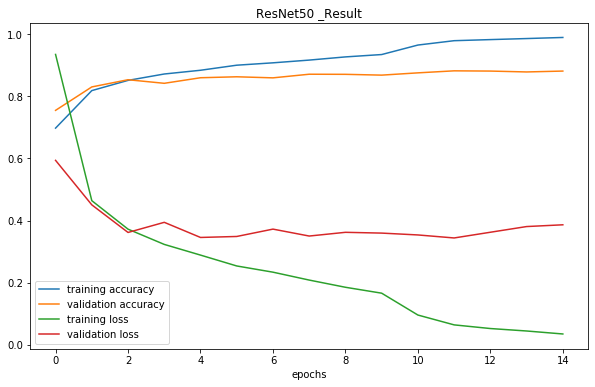

In [5]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
resnet50 = ResNet50(input_shape = (64, 64, 3), classes = 5)
resnet50.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
historyResnet = resnet50.fit(X_train, y_train, epochs = 15, batch_size = 128, verbose = 1, validation_data=(X_val, y_val), callbacks = [reduce_lr])
acc_plot(historyResnet.history, 'ResNet50')
# gen_csv(resnet50, 'ResNet50')

In [3]:
resnet50 = ResNet50(input_shape = (64, 64, 3), classes = 5)
plot_model(model = resnet50, to_file='ResNet50.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=300)

In [4]:
resnet50 = ResNet50(input_shape = (64, 64, 3), classes = 5)
resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
time_callback = TimeHistory()
resnet50.fit(X_train, y_train, epochs = 5, batch_size = 128, verbose = 0, validation_data=(X_val, y_val), callbacks = [time_callback])
print(time_callback.times)
start = time()
resnet50.evaluate(X_val, y_val, verbose=0)
print(time()-start)

[44.56914925575256, 36.00621676445007, 36.28971195220947, 35.974493980407715, 35.80961847305298]
7.658624887466431


In [3]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
X = np.dstack([np.array(df.iloc[:, 1:])] * 3).reshape(-1, 28, 28, 3)
X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64,64))) for im in X]).astype('float32')/255
X_train, X_val, y_train, y_val = train_test_split(X, df.iloc[:, 0], test_size=0.2)

In [5]:
resnet50 = ResNet50(input_shape = (64, 64, 3), classes = 5)
resnet50.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet50.fit(X_train, y_train, epochs = 15, batch_size = 128, verbose = 0)
p = np.argmax(resnet50.predict(X_val), axis=1)
print(precision_score(y_val, p, average=None))
print(recall_score(y_val, p, average=None))
print(f1_score(y_val, p, average=None))

[0.93654822 0.85243199 0.81506276 0.84840655 0.87510008]
[0.93457155 0.85313531 0.81234362 0.79821718 0.93378898]
[0.93555884 0.85278351 0.81370092 0.82254697 0.90349246]


### Inception

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPool2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
%matplotlib inline

In [2]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)

def acc_plot(history, name):
    plt.figure(figsize=(10,6))
    plt.plot(history['accuracy'], label='training accuracy')
    plt.plot(history['loss'], label='training loss')    
    plt.plot(history['val_accuracy'], label='validation accuracy')
    plt.plot(history['val_loss'], label='validation loss')
    plt.title(name + ' Accuracy and Loss')
    plt.xlabel('epochs')
    plt.legend()
#     plt.savefig(name +'_Result.png', bbox_inches='tight', dpi=300)
    return plt.show()
    
def gen_csv(model, name):
    result = dfTest[['Id']].copy()
    X_test = np.dstack([np.array(dfTest.iloc[:, 1:])] * 3).reshape(-1, 28, 28, 3)
    X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64,64))) for im in X_test]).astype('float32')/255
    result['Label'] = np.argmax(model.predict(X_test), axis=1)
    result.to_csv('result' + name + '.csv', encoding='utf-8', index=False)
    
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    pool = MaxPool2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out
 
# define model input
visible = Input(shape=(64, 64, 3))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)

for fc in [256, 128]:
    layer = Dense(fc, activation='relu')(layer)
    layer = Dropout(0.5)(layer)
layer = Flatten()(layer)
predictions = Dense(5, activation='softmax')(layer)

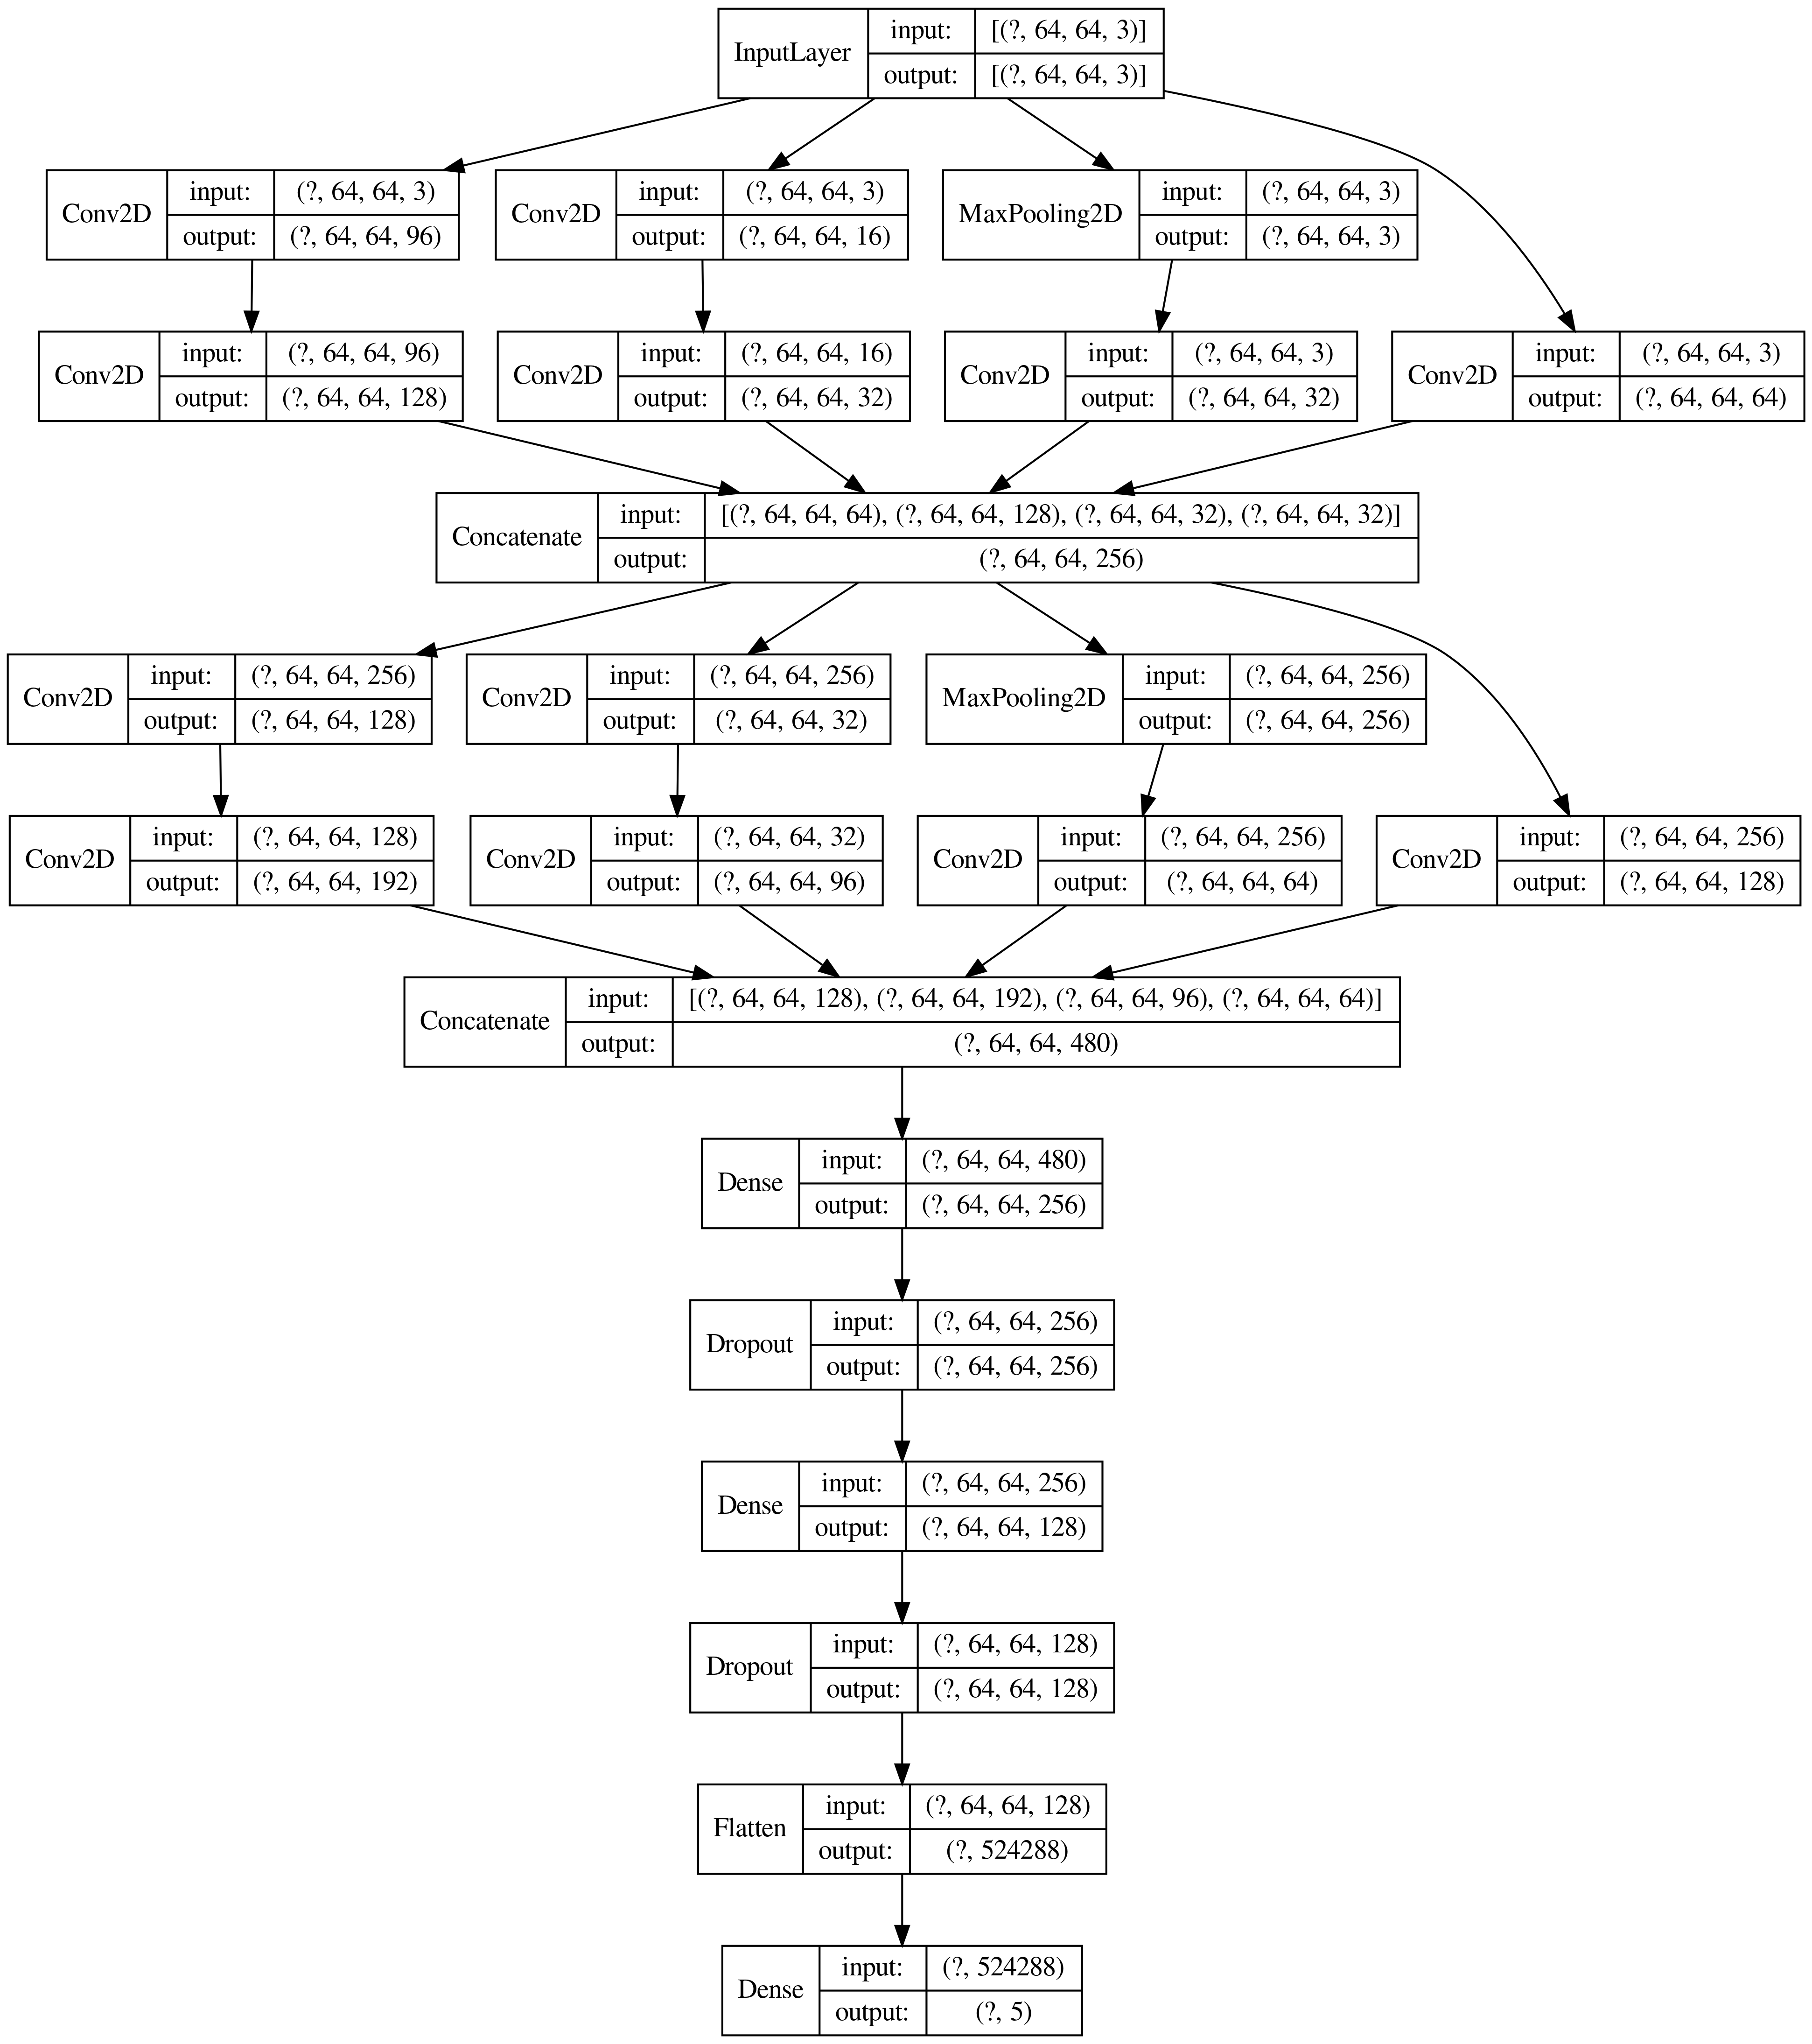

In [3]:
inception = Model(inputs=visible, outputs=predictions)
plot_model(model = inception, to_file='Inception.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=300)

In [3]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
dfTest = pd.read_csv('testX.csv')
X = np.array(df.iloc[:, 1:])
y = to_categorical(np.array(df.iloc[:, 0]))

X = np.dstack([X] * 3).reshape(-1, 28, 28, 3)
X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((64,64))) for im in X]).astype('float32')/255
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 169s 4ms/sample - loss: 0.6680 - accuracy: 0.7217 - val_loss: 0.6068 - val_accuracy: 0.7401
Epoch 2/25
48000/48000 [==============================] - 165s 3ms/sample - loss: 0.5064 - accuracy: 0.7915 - val_loss: 0.5060 - val_accuracy: 0.7874
Epoch 3/25
48000/48000 [==============================] - 165s 3ms/sample - loss: 0.4670 - accuracy: 0.8098 - val_loss: 0.4797 - val_accuracy: 0.8109
Epoch 4/25
48000/48000 [==============================] - 165s 3ms/sample - loss: 0.4293 - accuracy: 0.8253 - val_loss: 0.4750 - val_accuracy: 0.8070
Epoch 5/25
48000/48000 [==============================] - 165s 3ms/sample - loss: 0.3996 - accuracy: 0.8379 - val_loss: 0.4578 - val_accuracy: 0.8166
Epoch 6/25
48000/48000 [==============================] - 165s 3ms/sample - loss: 0.3795 - accuracy: 0.8459 - val_loss: 0.4471 - val_accuracy: 0.8217
Epoch 7/25
48000/48000 [==========================

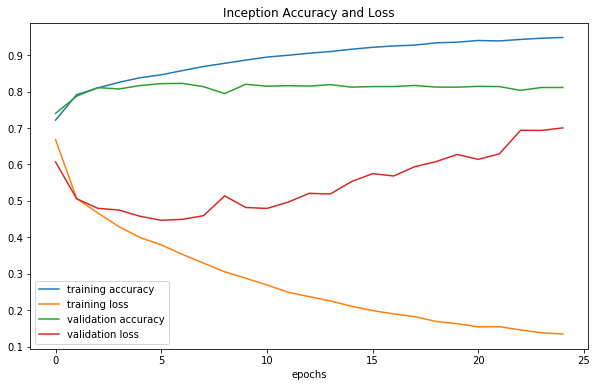

In [4]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
inception = Model(inputs=visible, outputs=predictions)
inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
historyInception = inception.fit(X_train, y_train, epochs = 25, batch_size = 32, verbose = 1, validation_data=(X_val, y_val), callbacks = [reduce_lr])
acc_plot(historyInception.history, 'Inception')
gen_csv(inception, 'Inception')

In [4]:
inception = Model(inputs=visible, outputs=predictions)
inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
time_callback = TimeHistory()
inception.fit(X_train, y_train, epochs = 5, batch_size = 128, verbose = 0, validation_data=(X_val, y_val), callbacks = [time_callback])
print(time_callback.times)
start = time()
inception.evaluate(X_val, y_val, verbose=0)
print(time()-start)

[167.00448989868164, 161.96628141403198, 162.01135110855103, 161.47093963623047, 161.44421887397766]
14.301845073699951


### VGG19 with imagenet pretrained weight

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [2]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
X = np.array(df.iloc[:, 1:])
y = to_categorical(np.array(df.iloc[:, 0]))

# Convert the training and test images into 3 channels
X = np.dstack([X] * 3)
# Reshape images as per the tensor format required by tensorflow
X = X.reshape(-1, 28,28,3)
X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((150,150))) for im in X])
X = X.astype('float32')/255

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [4]:
# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (150, 150, 3), classes = 5)
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [5]:
# Preprocessing the input 
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [6]:
# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size=256)
test_features = vgg19.predict(np.array(X_test), batch_size=256)
val_features = vgg19.predict(np.array(X_val), batch_size=256)
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

In [8]:
# Flatten extracted features
train_features = np.reshape(train_features, (48000, 4*4*512))
test_features = np.reshape(test_features, (6000, 4*4*512))
val_features = np.reshape(val_features, (6000, 4*4*512))

In [9]:
model = Sequential([
    Dense(512, activation='relu', input_dim=4*4*512),
    Dropout(0.5),
    Dense(5, activation="softmax")
])
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
# Train the the model
history = model.fit(train_features, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(val_features, y_val))

Train on 48000 samples, validate on 6000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 59us/sample - loss: 1.5588 - accuracy: 0.3438 - val_loss: 1.2661 - val_accuracy: 0.4767
Epoch 2/50
48000/48000 [==============================] - 2s 43us/sample - loss: 1.2444 - accuracy: 0.4401 - val_loss: 1.1444 - val_accuracy: 0.5095
Epoch 3/50
48000/48000 [==============================] - 2s 43us/sample - loss: 1.1830 - accuracy: 0.4715 - val_loss: 1.1033 - val_accuracy: 0.5433
Epoch 4/50
48000/48000 [==============================] - 2s 42us/sample - loss: 1.1382 - accuracy: 0.4927 - val_loss: 1.0085 - val_accuracy: 0.5652
Epoch 5/50
48000/48000 [==============================] - 2s 42us/sample - loss: 1.1196 - accuracy: 0.5033 - val_loss: 0.9708 - val_accuracy: 0.5887
Epoch 6/50
48000/48000 [==============================] - 2s 42us/sample - loss: 1.1093 - accuracy: 0.5087 - val_loss: 1.0231 - val_accuracy: 0.5737
Epoch 7/50
48000/48000 [==============================] -

In [11]:
score = model.evaluate(test_features, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8325433111190796
Test accuracy: 0.65533334


### Transfer learning on InceptionV3

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [5]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
X = np.array(df.iloc[:, 1:])
y = to_categorical(np.array(df.iloc[:, 0]))

# Convert the training and test images into 3 channels
X = np.dstack([X] * 3)
# Reshape images as per the tensor format required by tensorflow
X = X.reshape(-1, 28,28,3)
X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((150,150))) for im in X])
X = X.astype('float32')/255

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
for fc in [1024, 512, 256]:
    x = Dense(fc, activation='relu')(x)
    x = Dropout(dropout)(x)
# x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 49s 1ms/sample - loss: 1.2208 - accuracy: 0.5310 - val_loss: 1.8553 - val_accuracy: 0.4417
Epoch 2/50
48000/48000 [==============================] - 42s 873us/sample - loss: 0.8428 - accuracy: 0.6455 - val_loss: 2.2835 - val_accuracy: 0.4398
Epoch 3/50
48000/48000 [==============================] - 42s 870us/sample - loss: 0.7434 - accuracy: 0.6875 - val_loss: 3.7044 - val_accuracy: 0.3965
Epoch 4/50
48000/48000 [==============================] - 41s 855us/sample - loss: 0.6751 - accuracy: 0.7222 - val_loss: 3.1960 - val_accuracy: 0.4030
Epoch 5/50
48000/48000 [==============================] - 41s 857us/sample - loss: 0.6124 - accuracy: 0.7477 - val_loss: 3.6605 - val_accuracy: 0.3892
Epoch 6/50
48000/48000 [==============================] - 41s 854us/sample - loss: 0.5573 - accuracy: 0.7761 - val_loss: 3.8451 - val_accuracy: 0.4103
Epoch 7/50
47872/48000 [======================

In [8]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_2
1 conv2d_94
2 batch_normalization_94
3 activation_94
4 conv2d_95
5 batch_normalization_95
6 activation_95
7 conv2d_96
8 batch_normalization_96
9 activation_96
10 max_pooling2d_4
11 conv2d_97
12 batch_normalization_97
13 activation_97
14 conv2d_98
15 batch_normalization_98
16 activation_98
17 max_pooling2d_5
18 conv2d_102
19 batch_normalization_102
20 activation_102
21 conv2d_100
22 conv2d_103
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_99
29 conv2d_101
30 conv2d_104
31 conv2d_105
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_109
42 batch_normalization_109
43 activation_109
44 conv2d_107
45 conv2d_110
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10
51 conv2d_106
52 conv2d_108
53 conv2d

In [9]:
for layer in model.layers[:288]:
   layer.trainable = False
for layer in model.layers[288:]:
   layer.trainable = True

model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(X_val, y_val))

Train on 48000 samples, validate on 6000 samples
Epoch 1/50
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.0762 - val_loss: 15.1119
Epoch 2/50
48000/48000 [==============================] - 42s 879us/sample - loss: 0.0442 - val_loss: 14.9987
Epoch 3/50
48000/48000 [==============================] - 43s 900us/sample - loss: 0.0387 - val_loss: 15.0123
Epoch 4/50
48000/48000 [==============================] - 45s 929us/sample - loss: 0.0339 - val_loss: 14.9877
Epoch 5/50
48000/48000 [==============================] - 42s 882us/sample - loss: 0.0293 - val_loss: 15.0370
Epoch 6/50
48000/48000 [==============================] - 44s 913us/sample - loss: 0.0274 - val_loss: 14.6454
Epoch 7/50
48000/48000 [==============================] - 44s 927us/sample - loss: 0.0244 - val_loss: 14.8529
Epoch 8/50
48000/48000 [==============================] - 43s 889us/sample - loss: 0.0254 - val_loss: 14.6497
Epoch 9/50
48000/48000 [==============================] - 44s 919us/sampl

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 14.827917289733886


### Hyperparameters tuning using hyperas and hyperopt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
def data():
    X_train, X_val, y_train, y_val = train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), to_categorical(df.iloc[:,0], num_classes=5), test_size=0.2)
    return X_train, y_train, X_val, y_val

def model(X_train, y_train, X_val, y_val):
    model = Sequential()
    model_choice = {{choice(['one', 'two'])}}
    if model_choice == 'one':
        model.add(Conv2D(16, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))
        model.add(Conv2D(16, kernel_size=3, activation='relu',padding='same'))
        model.add(MaxPool2D(pool_size=2,strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
        model.add(Conv2D(32, kernel_size=3, activation='relu'))
        model.add(Conv2D(32, kernel_size=3, activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=2,strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
    elif model_choice == 'two':
        model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))
        model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
        model.add(MaxPool2D(pool_size=2,strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
        model.add(Conv2D(64, kernel_size=3, activation='relu'))
        model.add(Conv2D(64, kernel_size=3, activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=2,strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Flatten())
    model.add(Dense({{choice([256, 512,1024])}}, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout({{uniform(0, 1)}}))
    choiceval = {{choice(['one', 'two'])}}
    if choiceval == 'two':
        model.add(Dense({{choice([256, 512,1024])}}, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(5, activation='softmax'))
    
    adam = Adam(lr=0.001)
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    model.fit(X_train, y_train, batch_size=256, epochs=15, verbose=2, validation_data=(X_val, y_val))
    score, acc = model.evaluate(X_val, y_val, verbose=0)
    print('Val accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

def acc_plot(history, name):
    plt.figure(figsize=(10,6))
    plt.plot(history['accuracy'], label='training accuracy')
    plt.plot(history['loss'], label='training loss')    
    plt.plot(history['val_accuracy'], label='validation accuracy')
    plt.plot(history['val_loss'], label='validation loss')
    plt.title(name + ' Accuracy and Loss')
    plt.xlabel('epochs')
    plt.legend()
#     plt.savefig(name +'_Result.png', bbox_inches='tight', dpi=300)
    return plt.show()

def gen_csv(model, name):
    result = dfTest[['Id']].copy()
    result['Label'] = model.predict_classes(MinMaxScaler().fit_transform(dfTest.iloc[:,1:]).reshape((-1, 28, 28, 1)))
    result.to_csv('result' + name + '.csv', encoding='utf-8', index=False)

In [9]:
X_train, y_train, X_val, y_val = data()
best_run, best_model = optim.minimize(model=model, data=data, algo=tpe.suggest, max_evals=50, trials=Trials(), notebook_name='tuning')

>>> Imports:
#coding=utf-8

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.preprocessing import MinMaxScaler
except:
    pass

try:
    from tensorflow.keras import Sequential
except:
    pass

try:
    from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
except:
    pass

try:
    from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
except:
    pass

try:
    from tensorflow.keras.utils import to_categorical, plot_model
except:
    pass

try:
    from tensorflow.keras.callbacks import ReduceLROnPlateau
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    

48000/48000 - 2s - loss: 0.9235 - accuracy: 0.5912 - val_loss: 3.7055 - val_accuracy: 0.1987

Epoch 6/15                                                                       
48000/48000 - 2s - loss: 0.8922 - accuracy: 0.6084 - val_loss: 3.8343 - val_accuracy: 0.1985

Epoch 7/15                                                                       
48000/48000 - 2s - loss: 0.8741 - accuracy: 0.6165 - val_loss: 4.1887 - val_accuracy: 0.1984

Epoch 8/15                                                                       
48000/48000 - 2s - loss: 0.8543 - accuracy: 0.6280 - val_loss: 4.1929 - val_accuracy: 0.1984

Epoch 9/15                                                                       
48000/48000 - 2s - loss: 0.8442 - accuracy: 0.6335 - val_loss: 4.6069 - val_accuracy: 0.1982

Epoch 10/15                                                                      
48000/48000 - 2s - loss: 0.8305 - accuracy: 0.6381 - val_loss: 5.1422 - val_accuracy: 0.1982

Epoch 11/15               

Val accuracy:                                                                    
0.23291667                                                                       
Train on 48000 samples, validate on 12000 samples                                 
Epoch 1/15                                                                        
48000/48000 - 3s - loss: 0.8633 - accuracy: 0.6622 - val_loss: 2.0681 - val_accuracy: 0.3624

Epoch 2/15                                                                        
48000/48000 - 3s - loss: 0.5439 - accuracy: 0.7818 - val_loss: 2.0080 - val_accuracy: 0.4529

Epoch 3/15                                                                        
48000/48000 - 2s - loss: 0.4836 - accuracy: 0.8062 - val_loss: 2.2241 - val_accuracy: 0.4547

Epoch 4/15                                                                        
48000/48000 - 2s - loss: 0.4527 - accuracy: 0.8167 - val_loss: 2.9170 - val_accuracy: 0.4250

Epoch 5/15                                   

Epoch 10/15                                                                       
48000/48000 - 2s - loss: 0.5301 - accuracy: 0.7894 - val_loss: 0.5939 - val_accuracy: 0.7456

Epoch 11/15                                                                       
48000/48000 - 3s - loss: 0.5137 - accuracy: 0.7988 - val_loss: 0.7975 - val_accuracy: 0.7036

Epoch 12/15                                                                       
48000/48000 - 2s - loss: 0.5033 - accuracy: 0.7996 - val_loss: 0.6532 - val_accuracy: 0.7383

Epoch 13/15                                                                       
48000/48000 - 3s - loss: 0.4939 - accuracy: 0.8029 - val_loss: 0.5284 - val_accuracy: 0.7741

Epoch 14/15                                                                       
48000/48000 - 2s - loss: 0.4821 - accuracy: 0.8092 - val_loss: 0.5072 - val_accuracy: 0.7725

Epoch 15/15                                                                       
48000/48000 - 2s - loss: 0.4801 

Epoch 4/15                                                                        
48000/48000 - 2s - loss: 1.2712 - accuracy: 0.4602 - val_loss: 1.6247 - val_accuracy: 0.3305

Epoch 5/15                                                                        
48000/48000 - 2s - loss: 1.2131 - accuracy: 0.4797 - val_loss: 1.0702 - val_accuracy: 0.5118

Epoch 6/15                                                                        
48000/48000 - 2s - loss: 1.1444 - accuracy: 0.5058 - val_loss: 1.1204 - val_accuracy: 0.4878

Epoch 7/15                                                                        
48000/48000 - 2s - loss: 1.1050 - accuracy: 0.5199 - val_loss: 1.5113 - val_accuracy: 0.3685

Epoch 8/15                                                                        
48000/48000 - 2s - loss: 1.0678 - accuracy: 0.5319 - val_loss: 0.6928 - val_accuracy: 0.7362

Epoch 9/15                                                                        
48000/48000 - 2s - loss: 1.0301 

48000/48000 - 3s - loss: 0.5132 - accuracy: 0.7922 - val_loss: 0.4849 - val_accuracy: 0.7901

Epoch 15/15                                                                       
48000/48000 - 2s - loss: 0.5036 - accuracy: 0.7958 - val_loss: 0.6172 - val_accuracy: 0.7412

Val accuracy:                                                                     
0.74125                                                                           
Train on 48000 samples, validate on 12000 samples                                 
Epoch 1/15                                                                        
48000/48000 - 3s - loss: 1.2969 - accuracy: 0.5299 - val_loss: 1.9120 - val_accuracy: 0.2080

Epoch 2/15                                                                        
48000/48000 - 2s - loss: 0.7664 - accuracy: 0.6801 - val_loss: 1.3844 - val_accuracy: 0.4451

Epoch 3/15                                                                        
48000/48000 - 2s - loss: 0.6622 - accuracy:

48000/48000 - 2s - loss: 0.3666 - accuracy: 0.8500 - val_loss: 1.3639 - val_accuracy: 0.5715

Epoch 9/15                                                                        
48000/48000 - 2s - loss: 0.3654 - accuracy: 0.8509 - val_loss: 0.6378 - val_accuracy: 0.7408

Epoch 10/15                                                                       
48000/48000 - 2s - loss: 0.3593 - accuracy: 0.8536 - val_loss: 0.6016 - val_accuracy: 0.7628

Epoch 11/15                                                                       
48000/48000 - 2s - loss: 0.3453 - accuracy: 0.8584 - val_loss: 0.4687 - val_accuracy: 0.8121

Epoch 12/15                                                                       
48000/48000 - 2s - loss: 0.3364 - accuracy: 0.8627 - val_loss: 0.8046 - val_accuracy: 0.7168

Epoch 13/15                                                                       
48000/48000 - 2s - loss: 0.3313 - accuracy: 0.8644 - val_loss: 0.4345 - val_accuracy: 0.8212

Epoch 14/15          

48000/48000 - 2s - loss: 0.5357 - accuracy: 0.7831 - val_loss: 0.9208 - val_accuracy: 0.5904

Epoch 3/15                                                                        
48000/48000 - 2s - loss: 0.4771 - accuracy: 0.8088 - val_loss: 0.4179 - val_accuracy: 0.8372

Epoch 4/15                                                                        
48000/48000 - 2s - loss: 0.4415 - accuracy: 0.8200 - val_loss: 0.5437 - val_accuracy: 0.7731

Epoch 5/15                                                                        
48000/48000 - 2s - loss: 0.4206 - accuracy: 0.8299 - val_loss: 0.3901 - val_accuracy: 0.8392

Epoch 6/15                                                                        
48000/48000 - 2s - loss: 0.4043 - accuracy: 0.8368 - val_loss: 0.4338 - val_accuracy: 0.8165

Epoch 7/15                                                                        
48000/48000 - 2s - loss: 0.3937 - accuracy: 0.8402 - val_loss: 0.4041 - val_accuracy: 0.8332

Epoch 8/15           

Val accuracy:                                                                     
0.7690833                                                                         
Train on 48000 samples, validate on 12000 samples                                 
Epoch 1/15                                                                        
48000/48000 - 3s - loss: 0.7948 - accuracy: 0.6788 - val_loss: 1.7242 - val_accuracy: 0.2003

Epoch 2/15                                                                        
48000/48000 - 2s - loss: 0.5521 - accuracy: 0.7748 - val_loss: 0.9980 - val_accuracy: 0.5512

Epoch 3/15                                                                        
48000/48000 - 2s - loss: 0.4923 - accuracy: 0.8001 - val_loss: 0.5925 - val_accuracy: 0.7459

Epoch 4/15                                                                        
48000/48000 - 2s - loss: 0.4601 - accuracy: 0.8140 - val_loss: 0.3977 - val_accuracy: 0.8396

Epoch 5/15                                 

Epoch 10/15                                                                       
48000/48000 - 2s - loss: 0.4339 - accuracy: 0.8264 - val_loss: 0.3617 - val_accuracy: 0.8468

Epoch 11/15                                                                       
48000/48000 - 2s - loss: 0.4135 - accuracy: 0.8342 - val_loss: 0.3532 - val_accuracy: 0.8491

Epoch 12/15                                                                       
48000/48000 - 2s - loss: 0.4094 - accuracy: 0.8366 - val_loss: 0.4228 - val_accuracy: 0.8167

Epoch 13/15                                                                       
48000/48000 - 2s - loss: 0.4011 - accuracy: 0.8404 - val_loss: 0.3889 - val_accuracy: 0.8363

Epoch 14/15                                                                       
48000/48000 - 2s - loss: 0.3933 - accuracy: 0.8438 - val_loss: 0.3445 - val_accuracy: 0.8572

Epoch 15/15                                                                       
48000/48000 - 2s - loss: 0.3834 

In [6]:
print(best_run)

{'Dense': 0, 'Dense_1': 1, 'Dropout': 0.5918865882659488, 'Dropout_1': 0.8876225621897421, 'Dropout_2': 0.132436780822, 'Dropout_3': 0.2576750244735247, 'Dropout_4': 0.3144048645633753, 'Dropout_5': 0.12715375214014452, 'model_choice': 1, 'model_choice_1': 1}


In [8]:
print(best_model.evaluate(X_val, y_val))

12000/12000 [==============================] - 1s 118us/sample - loss: 0.2444 - accuracy: 0.9014
[0.244437867273887, 0.90141666]


In [33]:
def modelCNN1(X_train, y_train, X_val, y_val):
    CNN1 = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
        MaxPool2D(pool_size=(2, 2)),
        Dropout({{uniform(0, 1)}}),
        Flatten(),
        Dense({{choice([256, 512,1024])}}, activation='relu'),
        Dense(5, activation='softmax')
    ])

    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    elif choiceval == 'rmsprop':
        optim = RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
    else:
        optim = SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
    CNN1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optim)
    CNN1.fit(X_train, y_train, batch_size=256, epochs=15, verbose=2, validation_data=(X_val, y_val))
    score, acc = CNN1.evaluate(X_val, y_val, verbose=0)
    print('Val accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': CNN1}

X_train, y_train, X_val, y_val = data()
best_run, best_model = optim.minimize(model=modelCNN1, data=data, algo=tpe.suggest, max_evals=30, trials=Trials(), notebook_name='tuning')

>>> Imports:
#coding=utf-8

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.preprocessing import MinMaxScaler
except:
    pass

try:
    from tensorflow.keras import Sequential
except:
    pass

try:
    from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
except:
    pass

try:
    from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
except:
    pass

try:
    from tensorflow.keras.utils import to_categorical, plot_model
except:
    pass

try:
    from tensorflow.keras.callbacks import ReduceLROnPlateau
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    

48000/48000 - 1s - loss: 1.0218 - accuracy: 0.5707 - val_loss: 0.9919 - val_accuracy: 0.5787

Epoch 15/15                                                                      
48000/48000 - 1s - loss: 0.9913 - accuracy: 0.5799 - val_loss: 0.9635 - val_accuracy: 0.5871

Val accuracy:                                                                    
0.58708334                                                                       
Train on 48000 samples, validate on 12000 samples                                
Epoch 1/15                                                                       
48000/48000 - 2s - loss: 227.8601 - accuracy: 0.3668 - val_loss: 1.6278 - val_accuracy: 0.1982

Epoch 2/15                                                                       
48000/48000 - 1s - loss: 1.6132 - accuracy: 0.2006 - val_loss: 1.6170 - val_accuracy: 0.1970

Epoch 3/15                                                                       
48000/48000 - 1s - loss: 1.6131 - accuracy: 0.20

48000/48000 - 1s - loss: 1.6120 - accuracy: 0.1983 - val_loss: 1.6101 - val_accuracy: 0.1970

Epoch 9/15                                                                        
48000/48000 - 1s - loss: 1.6115 - accuracy: 0.1990 - val_loss: 1.6142 - val_accuracy: 0.1972

Epoch 10/15                                                                       
48000/48000 - 1s - loss: 1.6120 - accuracy: 0.1980 - val_loss: 1.6149 - val_accuracy: 0.1972

Epoch 11/15                                                                       
48000/48000 - 1s - loss: 1.6118 - accuracy: 0.2027 - val_loss: 1.6106 - val_accuracy: 0.2055

Epoch 12/15                                                                       
48000/48000 - 1s - loss: 1.6117 - accuracy: 0.2022 - val_loss: 1.6118 - val_accuracy: 0.1972

Epoch 13/15                                                                       
48000/48000 - 1s - loss: 1.6115 - accuracy: 0.1997 - val_loss: 1.6117 - val_accuracy: 0.1972

Epoch 14/15          

48000/48000 - 1s - loss: 1.0500 - accuracy: 0.5540 - val_loss: 0.9141 - val_accuracy: 0.5978

Epoch 3/15                                                                        
48000/48000 - 1s - loss: 0.8724 - accuracy: 0.6238 - val_loss: 0.7989 - val_accuracy: 0.6489

Epoch 4/15                                                                        
48000/48000 - 1s - loss: 0.8039 - accuracy: 0.6479 - val_loss: 0.7598 - val_accuracy: 0.6651

Epoch 5/15                                                                        
48000/48000 - 1s - loss: 0.7675 - accuracy: 0.6691 - val_loss: 0.7224 - val_accuracy: 0.6936

Epoch 6/15                                                                        
48000/48000 - 1s - loss: 0.7433 - accuracy: 0.6818 - val_loss: 0.6989 - val_accuracy: 0.7044

Epoch 7/15                                                                        
48000/48000 - 1s - loss: 0.7182 - accuracy: 0.6951 - val_loss: 0.6694 - val_accuracy: 0.7199

Epoch 8/15           

Val accuracy:                                                                     
0.56458336                                                                        
Train on 48000 samples, validate on 12000 samples                                 
Epoch 1/15                                                                        
48000/48000 - 2s - loss: 0.6830 - accuracy: 0.7068 - val_loss: 0.4890 - val_accuracy: 0.8037

Epoch 2/15                                                                        
48000/48000 - 1s - loss: 0.4769 - accuracy: 0.8052 - val_loss: 0.3962 - val_accuracy: 0.8433

Epoch 3/15                                                                        
48000/48000 - 1s - loss: 0.4204 - accuracy: 0.8288 - val_loss: 0.3814 - val_accuracy: 0.8486

Epoch 4/15                                                                        
48000/48000 - 1s - loss: 0.3869 - accuracy: 0.8436 - val_loss: 0.3353 - val_accuracy: 0.8673

Epoch 5/15                                 

Epoch 10/15                                                                       
48000/48000 - 1s - loss: 0.2921 - accuracy: 0.8834 - val_loss: 0.2959 - val_accuracy: 0.8838

Epoch 11/15                                                                       
48000/48000 - 1s - loss: 0.2818 - accuracy: 0.8854 - val_loss: 0.2981 - val_accuracy: 0.8775

Epoch 12/15                                                                       
48000/48000 - 1s - loss: 0.2702 - accuracy: 0.8923 - val_loss: 0.2931 - val_accuracy: 0.8827

Epoch 13/15                                                                       
48000/48000 - 1s - loss: 0.2597 - accuracy: 0.8956 - val_loss: 0.2824 - val_accuracy: 0.8844

Epoch 14/15                                                                       
48000/48000 - 1s - loss: 0.2531 - accuracy: 0.8974 - val_loss: 0.2791 - val_accuracy: 0.8897

Epoch 15/15                                                                       
48000/48000 - 1s - loss: 0.2480 

In [32]:
print(best_run)
print(best_model.evaluate(X_val, y_val))

{'Dense': 0, 'Dropout': 0.4261775040222384, 'choiceval': 0, 'lr': 0, 'lr_1': 0, 'lr_2': 2}
12000/12000 [==============================] - 1s 84us/sample - loss: 0.2697 - accuracy: 0.8941
[0.2697447367807229, 0.8940833]


In [35]:
def modelCNN2(X_train, y_train, X_val, y_val):
    CNN2 = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Dropout({{uniform(0, 1)}}),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout({{uniform(0, 1)}}),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Dropout({{uniform(0, 1)}}),
        Flatten(),
        Dense({{choice([256, 512,1024])}}, activation='relu'),
        BatchNormalization(),
        Dropout({{uniform(0, 1)}}),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout({{uniform(0, 1)}}),
        Dense(5, activation='softmax')
    ])

    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    elif choiceval == 'rmsprop':
        optim = RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
    else:
        optim = SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
    CNN2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optim)
    CNN2.fit(X_train, y_train, batch_size=256, epochs=15, verbose=2, validation_data=(X_val, y_val))
    score, acc = CNN2.evaluate(X_val, y_val, verbose=0)
    print('Val accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': CNN2}

X_train, y_train, X_val, y_val = data()
best_run, best_model = optim.minimize(model=modelCNN2, data=data, algo=tpe.suggest, max_evals=30, trials=Trials(), notebook_name='tuning')

>>> Imports:
#coding=utf-8

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.preprocessing import MinMaxScaler
except:
    pass

try:
    from tensorflow.keras import Sequential
except:
    pass

try:
    from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
except:
    pass

try:
    from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
except:
    pass

try:
    from tensorflow.keras.utils import to_categorical, plot_model
except:
    pass

try:
    from tensorflow.keras.callbacks import ReduceLROnPlateau
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    

48000/48000 - 5s - loss: 1.6908 - accuracy: 0.2958 - val_loss: 2.5094 - val_accuracy: 0.2020

Epoch 10/15                                                                      
48000/48000 - 5s - loss: 1.6514 - accuracy: 0.3078 - val_loss: 2.5355 - val_accuracy: 0.2020

Epoch 11/15                                                                      
48000/48000 - 5s - loss: 1.6205 - accuracy: 0.3111 - val_loss: 2.5535 - val_accuracy: 0.2020

Epoch 12/15                                                                      
48000/48000 - 5s - loss: 1.5939 - accuracy: 0.3165 - val_loss: 2.5789 - val_accuracy: 0.2020

Epoch 13/15                                                                      
48000/48000 - 5s - loss: 1.5581 - accuracy: 0.3260 - val_loss: 2.6050 - val_accuracy: 0.2052

Epoch 14/15                                                                      
48000/48000 - 5s - loss: 1.5354 - accuracy: 0.3284 - val_loss: 2.6297 - val_accuracy: 0.2628

Epoch 15/15               

48000/48000 - 5s - loss: 0.6133 - accuracy: 0.7538 - val_loss: 1.8052 - val_accuracy: 0.4911

Epoch 4/15                                                                        
48000/48000 - 5s - loss: 0.5541 - accuracy: 0.7805 - val_loss: 0.5018 - val_accuracy: 0.7937

Epoch 5/15                                                                        
48000/48000 - 5s - loss: 0.5365 - accuracy: 0.7885 - val_loss: 1.2857 - val_accuracy: 0.5950

Epoch 6/15                                                                        
48000/48000 - 5s - loss: 0.4971 - accuracy: 0.8022 - val_loss: 0.6104 - val_accuracy: 0.7632

Epoch 7/15                                                                        
48000/48000 - 5s - loss: 0.5249 - accuracy: 0.7896 - val_loss: 0.5354 - val_accuracy: 0.7830

Epoch 8/15                                                                        
48000/48000 - 5s - loss: 0.4813 - accuracy: 0.8084 - val_loss: 1.2972 - val_accuracy: 0.5692

Epoch 9/15           

48000/48000 - 5s - loss: 0.7987 - accuracy: 0.6719 - val_loss: 2.1040 - val_accuracy: 0.3137

Epoch 14/15                                                                       
48000/48000 - 5s - loss: 0.7900 - accuracy: 0.6759 - val_loss: 1.3973 - val_accuracy: 0.4207

Epoch 15/15                                                                       
48000/48000 - 5s - loss: 0.7780 - accuracy: 0.6811 - val_loss: 2.1445 - val_accuracy: 0.3132

Val accuracy:                                                                     
0.31316668                                                                        
Train on 48000 samples, validate on 12000 samples                                 
Epoch 1/15                                                                        
48000/48000 - 8s - loss: 1.4120 - accuracy: 0.4466 - val_loss: 3.5174 - val_accuracy: 0.1982

Epoch 2/15                                                                        
48000/48000 - 5s - loss: 0.9677 - accuracy:

48000/48000 - 5s - loss: 0.2936 - accuracy: 0.8898 - val_loss: 0.4043 - val_accuracy: 0.8511

Epoch 8/15                                                                        
48000/48000 - 5s - loss: 0.2786 - accuracy: 0.8947 - val_loss: 0.3414 - val_accuracy: 0.8700

Epoch 9/15                                                                        
48000/48000 - 5s - loss: 0.2608 - accuracy: 0.9030 - val_loss: 0.3834 - val_accuracy: 0.8649

Epoch 10/15                                                                       
48000/48000 - 5s - loss: 0.2496 - accuracy: 0.9071 - val_loss: 0.8397 - val_accuracy: 0.7552

Epoch 11/15                                                                       
48000/48000 - 5s - loss: 0.2282 - accuracy: 0.9153 - val_loss: 0.3261 - val_accuracy: 0.8873

Epoch 12/15                                                                       
48000/48000 - 5s - loss: 0.2217 - accuracy: 0.9179 - val_loss: 0.3374 - val_accuracy: 0.8837

Epoch 13/15          

48000/48000 - 7s - loss: 0.8945 - accuracy: 0.6626 - val_loss: 26.1270 - val_accuracy: 0.2107

Epoch 2/15                                                                        
48000/48000 - 5s - loss: 0.5670 - accuracy: 0.7831 - val_loss: 17.0442 - val_accuracy: 0.2459

Epoch 3/15                                                                        
48000/48000 - 5s - loss: 0.4853 - accuracy: 0.8178 - val_loss: 1.6845 - val_accuracy: 0.5968

Epoch 4/15                                                                        
48000/48000 - 5s - loss: 0.4363 - accuracy: 0.8387 - val_loss: 1.7037 - val_accuracy: 0.6302

Epoch 5/15                                                                        
48000/48000 - 5s - loss: 0.4101 - accuracy: 0.8499 - val_loss: 1.7178 - val_accuracy: 0.6544

Epoch 6/15                                                                        
48000/48000 - 5s - loss: 0.3775 - accuracy: 0.8602 - val_loss: 0.8114 - val_accuracy: 0.7558

Epoch 7/15         

In [36]:
print(best_run)
print(best_model.evaluate(X_val, y_val))

{'Dense': 0, 'Dropout': 0.001154900332688294, 'Dropout_1': 0.014244592769077968, 'Dropout_2': 0.1339600303017593, 'Dropout_3': 0.25215126323219333, 'Dropout_4': 0.7446448685656921, 'choiceval': 2, 'lr': 0, 'lr_1': 1, 'lr_2': 2}
12000/12000 [==============================] - 1s 112us/sample - loss: 0.3544 - accuracy: 0.8885
[0.3543927517036597, 0.8885]
